prompt:

請幫我生成一個基於 Hugging Face 的 Python 程式碼，用於情感分析和問答系統的整合應用。要求如下：

情感分析：

使用 Hugging Face 提供的 pipeline("sentiment-analysis")，專注於英文文本情緒分析。
提供一些範例句子進行情感分析並打印結果。
問答系統：

使用 Hugging Face 的 pipeline("question-answering")，在上下文中回答問題。
提供一段上下文和幾個問題，並打印每個問題的答案。
實時操作：

創建一個函數，根據輸入消息分析情感並生成回應。
當情緒是正面的時候，基於問答系統提供回答；如果是負面或中性，則提供適當的建議或詢問更多細節。
Gradio 界面：

使用 Gradio 創建一個互動界面，允許用戶輸入訊息並返回情感分析結果和建議回答。
界面應包含輸入框和兩個輸出框，一個顯示情感分析結果，另一個顯示建議回答。
程式碼應結構清晰、註解完整，並能在 Google Colab 或本地 Python 環境中運行。

In [8]:
# 安裝所需的庫
!pip install transformers torch gradio

# 匯入所需的模組
from transformers import pipeline
import gradio as gr

# 初始化情感分析模型（使用英文支持）
sentiment_analyzer = pipeline("sentiment-analysis")

# 初始化問答系統模型（使用英文支持）
qa_pipeline = pipeline("question-answering")

# ========== 情感分析範例 ========== #
print("\n情感分析範例")
text_to_analyze = [
    "I love programming! It's so exciting to build new things.",
    "I'm feeling quite bored and tired today.",
    "This is the worst experience I've ever had.",
    "I'm not sure about this decision, but I hope it works out.",
    "This is amazing! Best day ever!",
    "I don't like this product. It's not what I expected.",
    "I'm feeling so overwhelmed with everything right now.",
    "Wow, this is so much fun!",
    "This service is okay, but it could be better.",
    "I'm really frustrated with the lack of communication."
]

for text in text_to_analyze:
    result = sentiment_analyzer(text)
    print(f"文本: {text}")
    print(f"結果: {result}\n")

# ========== 問答系統範例 ========== #
print("\n問答系統範例")
context = "Hugging Face is a company that provides open-source libraries for NLP and machine learning. The Transformers library is one of their most popular projects."
questions = [
    "What does Hugging Face provide?",
    "What is the Transformers library?",
    "Who is responsible for the Transformers project?"
]

for question in questions:
    result = qa_pipeline(question=question, context=context)
    print(f"問題: {question}")
    print(f"答案: {result['answer']}\n")

# ========== 實時操作的介面 ========== #
def analyze_sentiment_and_answer(message, context):
    sentiment_result = sentiment_analyzer(message)
    sentiment = sentiment_result[0]['label']

    try:
        # 使用情感和上下文提供更具體的建議回答
        if sentiment == "POSITIVE":
            qa_result = qa_pipeline(question=message, context=context)
            answer = qa_result['answer']
        elif sentiment == "NEGATIVE":
            answer = "It seems you're feeling negative about this. How can I assist you further?"
        else:
            answer = "Thank you for sharing. Can you provide more details?"
    except Exception as e:
        answer = "I'm sorry, I couldn't generate an appropriate response. Please try rephrasing."

    return f"情緒分析: {sentiment}", f"建議回答: {answer}"

context = "Hugging Face is a company that provides open-source libraries for NLP and machine learning. The Transformers library is one of their most popular projects."

def interactive_interface(input_message):
    sentiment, response = analyze_sentiment_and_answer(input_message, context)
    return sentiment, response

# Gradio 介面
demo = gr.Interface(
    fn=interactive_interface,
    inputs=gr.Textbox(label="輸入訊息"),
    outputs=[
        gr.Textbox(label="情緒分析結果"),
        gr.Textbox(label="建議回答")
    ],
    title="實時英文情緒分析與回答生成",
    description="輸入一條英文訊息，分析其情緒並生成更真實的回答建議。"
)

# 運行 Gradio 介面
demo.launch()


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.



情感分析範例
文本: I love programming! It's so exciting to build new things.
結果: [{'label': 'POSITIVE', 'score': 0.9998704195022583}]

文本: I'm feeling quite bored and tired today.
結果: [{'label': 'NEGATIVE', 'score': 0.999718964099884}]

文本: This is the worst experience I've ever had.
結果: [{'label': 'NEGATIVE', 'score': 0.9997679591178894}]

文本: I'm not sure about this decision, but I hope it works out.
結果: [{'label': 'POSITIVE', 'score': 0.9997944235801697}]

文本: This is amazing! Best day ever!
結果: [{'label': 'POSITIVE', 'score': 0.9998809099197388}]

文本: I don't like this product. It's not what I expected.
結果: [{'label': 'NEGATIVE', 'score': 0.9997410178184509}]

文本: I'm feeling so overwhelmed with everything right now.
結果: [{'label': 'POSITIVE', 'score': 0.9995039701461792}]

文本: Wow, this is so much fun!
結果: [{'label': 'POSITIVE', 'score': 0.9998694658279419}]

文本: This service is okay, but it could be better.
結果: [{'label': 'NEGATIVE', 'score': 0.8836838006973267}]

文本: I'm really frustra

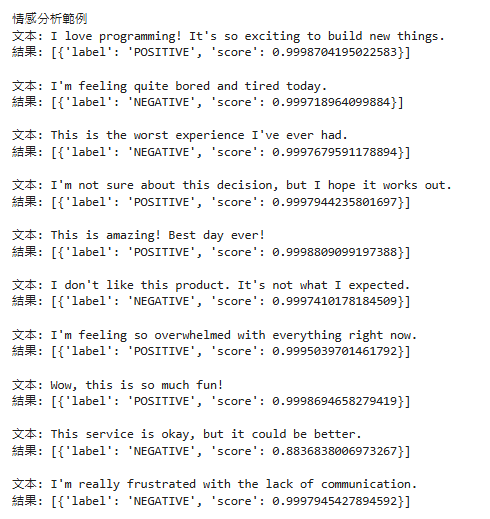

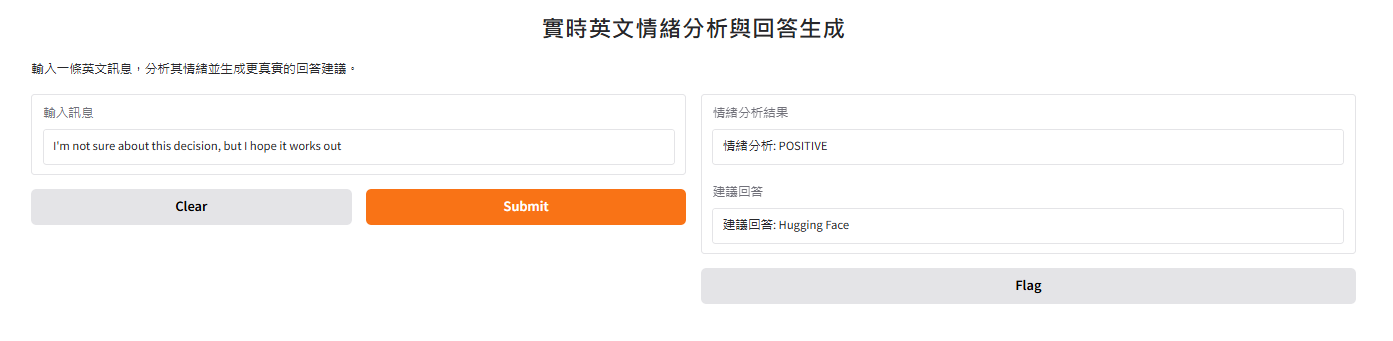